## Porazdelitve in osamelci

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

normal = stats.norm
student = stats.t
beta = stats.beta

##### Odgovor 4-1-1

In [2]:
mu = 0
sigma = 1
print("n\tmu\tsigma")
for n in [10, 100, 1000, 10000]:
    sample = normal.rvs(loc=mu, scale=sigma, size=n, random_state=42)
    mu_fit, sigma_fit = normal.fit(sample)
    print("%d\t%.3f\t%.3f" % (n, mu_fit, sigma_fit))

n	mu	sigma
10	0.448	0.686
100	-0.104	0.904
1000	0.019	0.979
10000	-0.002	1.003


##### Odgovor 4-1-2

In [3]:
sample = normal.rvs(loc=0, scale=1, size=20, random_state=42)
mu_fit, sigma_fit = normal.fit(sample)
df, loc, scale = student.fit(sample)

print("dist\tmu\tsigma")
print("norm\t%.3f\t%.3f" % (mu_fit, sigma_fit))
print("t\t%.3f\t%.3f" % (loc, scale))

dist	mu	sigma
norm	-0.171	0.936
t	-0.171	0.936


##### Odgovor 4-1-3

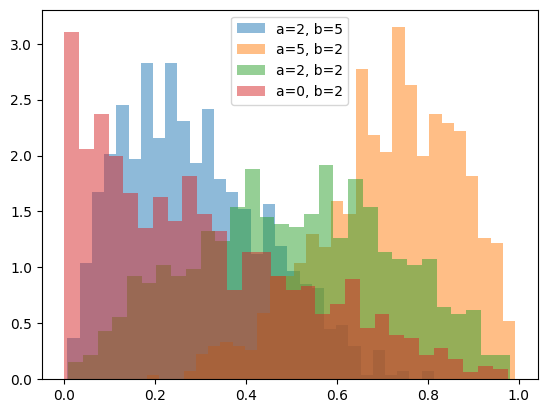

In [4]:
def plot_dist(a, b):
    sample = beta.rvs(a, b, size=1000, random_state=42)
    plt.hist(sample, bins=30, density=True, alpha=0.5, label="a=%i, b=%i" % (a, b))

plot_dist(2, 5)
plot_dist(5, 2)
plot_dist(2, 2)
plot_dist(0.9, 2)

plt.legend();

##### Odgovor 4-1-4

n	a	b
10	0.712	0.992
100	1.797	5.678
1000	2.018	3.733


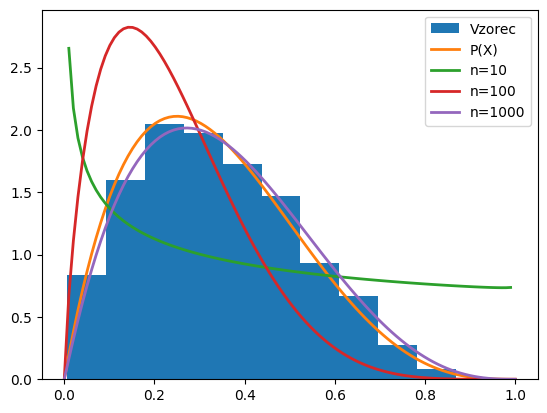

In [6]:
a, b = 2, 4
xr = np.linspace(0, 1, 100)  
P  = [beta(a,b).pdf(x) for x in xr]

plt.figure()
plt.hist(beta.rvs(a, b, size=2000, random_state=42),    label="Vzorec", density=True)
plt.plot(xr, P, label="P(X)", linewidth=2.0)

print("n\ta\tb")
for n in [10, 100, 1000]:
    sample = beta.rvs(a, b, size=n, random_state=42)
    a_fit, b_fit, _, _ = beta.fit(sample)
    P_fit = [beta.pdf(x, a_fit, b_fit) for x in xr]

    plt.plot(xr, P_fit, label="n=%d" % n, linewidth=2.0)
    print("%d\t%.3f\t%.3f" % (n, a_fit, b_fit))
    plt.legend();